#  Below is Python code that runs an Integrate and Fire Model, Take some time to investigate the code and then complete the worksheet on Canvas titled "Worksheet 2, Integrate & Fire"

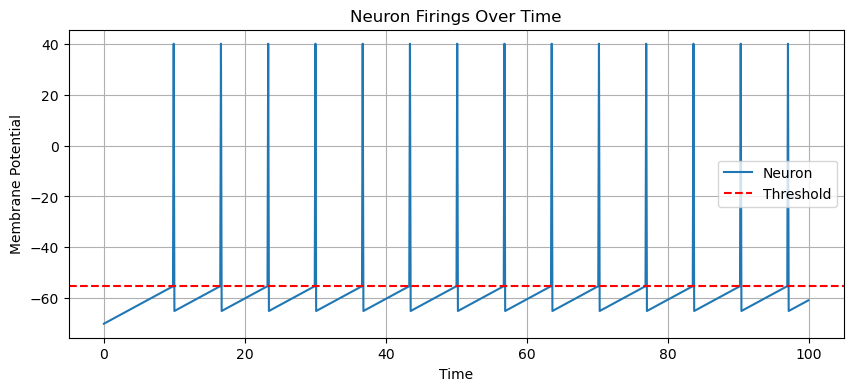

In [31]:
# Jupyter: enable plot rendering inside the notebook (this allows us to actually show the output of the code visually)
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# --- Neuron Parameters (realistic, in mV and pA) ---
C = 200.0      
V_th = -55 #threshold for neurons
V_reset = -65.0 
V_rest =  -70 #membrane potential at rest
I_ext = 300.0    
dt = 0.1   


T = 100          # total simulation time in ms
dt = 0.1         # time step in ms
time = np.arange(0, T, dt)  # time vector

# --- Initialize voltage and spike times ---
V = np.full_like(time, V_rest)  # set all values to resting voltage
spike_times = []

# --- Simulation Loop ---
for i in range(1, len(time)):
    dV = (I_ext / C) * dt       # ΔV = (I / C) * dt, in mV
    V[i] = V[i-1] + dV          

    if V[i] >= V_th:            
        V[i-1] = 40.0           # mark spike as +40 mV (for visualization)
        V[i] = V_reset         
        spike_times.append(time[i])





# --- Plotting ---
plt.figure(figsize=(10, 4))
plt.plot(time, V, label='Neuron')
plt.axhline(V_th, color='r', linestyle='--', label='Threshold')
plt.xlabel('Time') #what should the x be?
plt.ylabel('Membrane Potential') #what should the y be?
plt.title('Neuron Firings Over Time') #what is a good title?
plt.legend() #can you think of a legend? YES I FILLED IT IN WITH THE LABELS ABOVE 
plt.grid(True)
plt.show()



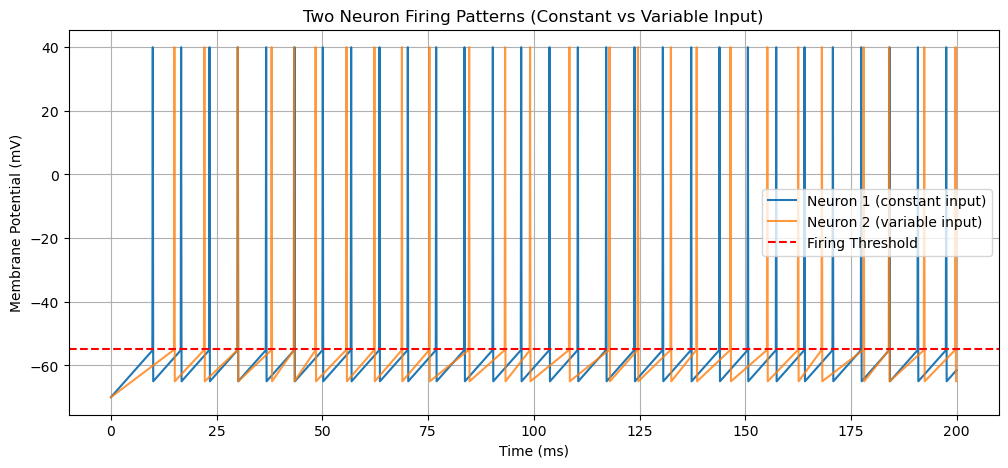

In [32]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# --- Neuron Parameters (realistic, in mV and pA) ---
C = 200.0       # capacitance
V_th = -55      # threshold for neurons (mV)
V_reset = -65.0 # reset potential (mV)
V_rest = -70    # membrane potential at rest (mV)
dt = 0.1        # time step (ms)
T = 200         # total simulation time (ms)

time = np.arange(0, T, dt)

# -----------------
# Neuron 1 (constant input current)
# -----------------
I_ext1 = 300.0  # constant current (pA)
V1 = np.full_like(time, V_rest, dtype=float)
spike_times1 = []

for i in range(1, len(time)):
    dV = (I_ext1 / C) * dt
    V1[i] = V1[i-1] + dV

    if V1[i] >= V_th:
        V1[i-1] = 40.0
        V1[i] = V_reset
        spike_times1.append(time[i])

# -----------------
# Neuron 2 (variable input current)
# -----------------
V2 = np.full_like(time, V_rest, dtype=float)
spike_times2 = []
I_ext2 = 200.0  # starting current

for i in range(1, len(time)):
    dV = (I_ext2 / C) * dt
    V2[i] = V2[i-1] + dV

    if V2[i] >= V_th:
        V2[i-1] = 40.0
        V2[i] = V_reset
        spike_times2.append(time[i])

        # --- Assurance: current changes for the next spike ---
        # (varies randomly between 200–400 pA each time neuron fires)
        I_ext2 = np.random.uniform(200.0, 400.0)

# -----------------
# Plotting
# -----------------
plt.figure(figsize=(12, 5))
plt.plot(time, V1, label='Neuron 1 (constant input)')
plt.plot(time, V2, label='Neuron 2 (variable input)', alpha=0.8)
plt.axhline(V_th, color='r', linestyle='--', label='Firing Threshold')

plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.title('Two Neuron Firing Patterns (Constant vs Variable Input)')
plt.legend()
plt.grid(True)
plt.show()